In [1]:
# Install packages for processing data
import urllib2
import json
import time

In [2]:
hdr = {'User-Agent': 'r/relationships test 1 17112015 by /u/PopularCactus'}
url = 'https://www.reddit.com/r/relationships/top/.json?sort=top&t=all&limit=100'
req = urllib2.Request(url, headers=hdr)
text_data = urllib2.urlopen(req).read()
data = json.loads(text_data)
data_all = data.values()[1]['children']

for i in range(1, 10):
    time.sleep(5)
    last = data_all[-1]['data']['name']
    url = 'https://www.reddit.com/r/relationships/top/.json?sort=top&t=all&limit=100&after=%s' % last
    req = urllib2.Request(url, headers=hdr)
    text_data = urllib2.urlopen(req).read()
    data = json.loads(text_data)
    data_all += data.values()[1]['children']

In [3]:
# Extract relevant data
article_title = []
article_flairs = []
article_date = []
article_comments = []
article_score = []

for i in range(0, len(data_all)):
    article_title.append(data_all[i]['data']['title'])
    article_flairs.append(data_all[i]['data']['link_flair_text'])
    article_date.append(data_all[i]['data']['created_utc'])
    article_comments.append(data_all[i]['data']['num_comments'])
    article_score.append(data_all[i]['data']['score'])

In [4]:
# Create DataFrame
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import re

rel_df = DataFrame({'Title': article_title,
                    'Flair': article_flairs,
                    'Date': article_date,
                    'Comments': article_comments,
                    'Score': article_score})

rel_df[:10]

,Comments,Date,Flair,Score,Title
0,901,1440187622,Updates,7682,[UPDATE]My [26 F] with my husband [29 M] 1 yea...
1,631,1438962646,◉ Locked Post ◉,5990,Update: I [30 F] am sitting in the back of my ...
2,622,1435026034,Updates,5496,UPDATE: My fiancee (24F) has no bridesmaids an...
3,974,1438393090,◉ Locked Post ◉,5271,My [42M] daughter [17F] has been bullying a gi...
4,769,1440543117,Updates,5169,[Update] My [26F] fiance's [28M] ex-wife [28F]...
5,515,1441197058,◉ Locked Post ◉,5081,Me [42F] with my son [15M] - should I have a t...
6,428,1424393866,Updates,4772,UPDATE: Me [23 M] with my Fiance [24 F] of 3 y...
7,161,1440341283,Updates,4708,UPDATE Me [26F] with my mother [49F] Who wants...
8,289,1437926061,Updates,4578,(update)I(30m) just found out my girlfriend(28...
9,618,1417909818,Infidelity,4500,[UPDATE 2] I [22M] suspect something between m...


In [5]:
# Format date
rel_df['Date'] = pd.to_datetime((rel_df['Date'].values*1e9).astype(int))
rel_df[:10]

,Comments,Date,Flair,Score,Title
0,901,2015-08-21 20:07:02,Updates,7682,[UPDATE]My [26 F] with my husband [29 M] 1 yea...
1,631,2015-08-07 15:50:46,◉ Locked Post ◉,5990,Update: I [30 F] am sitting in the back of my ...
2,622,2015-06-23 02:20:34,Updates,5496,UPDATE: My fiancee (24F) has no bridesmaids an...
3,974,2015-08-01 01:38:10,◉ Locked Post ◉,5271,My [42M] daughter [17F] has been bullying a gi...
4,769,2015-08-25 22:51:57,Updates,5169,[Update] My [26F] fiance's [28M] ex-wife [28F]...
5,515,2015-09-02 12:30:58,◉ Locked Post ◉,5081,Me [42F] with my son [15M] - should I have a t...
6,428,2015-02-20 00:57:46,Updates,4772,UPDATE: Me [23 M] with my Fiance [24 F] of 3 y...
7,161,2015-08-23 14:48:03,Updates,4708,UPDATE Me [26F] with my mother [49F] Who wants...
8,289,2015-07-26 15:54:21,Updates,4578,(update)I(30m) just found out my girlfriend(28...
9,618,2014-12-06 23:50:18,Infidelity,4500,[UPDATE 2] I [22M] suspect something between m...


In [6]:
# Replace 'Locked Post' with update where appropriate
replace_value = rel_df['Flair'][1]
rel_df['Flair'] = rel_df['Flair'].replace(replace_value, np.nan)

cond1 = rel_df['Title'].str.contains(
    '^\[?[a-z!?A-Z ]*UPDATE\]?:?', flags = re.IGNORECASE)
cond2 = rel_df['Flair'].isnull()

rel_df.loc[(cond1 & cond2), 'Flair'] = rel_df.loc[(cond1 & cond2), 'Flair'].replace(np.nan, 'Updates')
rel_df[:10]

,Comments,Date,Flair,Score,Title
0,901,2015-08-21 20:07:02,Updates,7682,[UPDATE]My [26 F] with my husband [29 M] 1 yea...
1,631,2015-08-07 15:50:46,Updates,5990,Update: I [30 F] am sitting in the back of my ...
2,622,2015-06-23 02:20:34,Updates,5496,UPDATE: My fiancee (24F) has no bridesmaids an...
3,974,2015-08-01 01:38:10,NaN,5271,My [42M] daughter [17F] has been bullying a gi...
4,769,2015-08-25 22:51:57,Updates,5169,[Update] My [26F] fiance's [28M] ex-wife [28F]...
5,515,2015-09-02 12:30:58,NaN,5081,Me [42F] with my son [15M] - should I have a t...
6,428,2015-02-20 00:57:46,Updates,4772,UPDATE: Me [23 M] with my Fiance [24 F] of 3 y...
7,161,2015-08-23 14:48:03,Updates,4708,UPDATE Me [26F] with my mother [49F] Who wants...
8,289,2015-07-26 15:54:21,Updates,4578,(update)I(30m) just found out my girlfriend(28...
9,618,2014-12-06 23:50:18,Infidelity,4500,[UPDATE 2] I [22M] suspect something between m...


In [7]:
# Calculate number of still missing flairs
rel_df['Flair'].isnull().sum()

93

In [8]:
# Extract poster age and sex
poster_age_sex = rel_df['Title'].str.extract(
    "((i\'m|i|my|me)\s?(\[|\()(m|f)?(\s|/)?[0-9]{1,2}(\s|/)?([m,f]|male|female)?(\]|\)))", 
        flags = re.IGNORECASE)[0]

In [9]:
poster_age_sex = poster_age_sex.str.replace("((i\'m|i|my|me))\s?", "", flags = re.IGNORECASE)
poster_age = poster_age_sex.str.extract('([0-9]{1,2})')
poster_sex = poster_age_sex.str.extract('([m,f])', flags = re.IGNORECASE)

rel_df['PosterAge'] = pd.to_numeric(poster_age)
rel_df['PosterSex'] = poster_sex.str.upper()

In [12]:
rel_df[:10]

,Comments,Date,Flair,Score,Title,PosterAge,PosterSex
0,901,2015-08-21 20:07:02,Updates,7682,[UPDATE]My [26 F] with my husband [29 M] 1 yea...,26,F
1,631,2015-08-07 15:50:46,Updates,5990,Update: I [30 F] am sitting in the back of my ...,30,F
2,622,2015-06-23 02:20:34,Updates,5496,UPDATE: My fiancee (24F) has no bridesmaids an...,25,M
3,974,2015-08-01 01:38:10,NaN,5271,My [42M] daughter [17F] has been bullying a gi...,42,M
4,769,2015-08-25 22:51:57,Updates,5169,[Update] My [26F] fiance's [28M] ex-wife [28F]...,26,F
5,515,2015-09-02 12:30:58,NaN,5081,Me [42F] with my son [15M] - should I have a t...,42,F
6,428,2015-02-20 00:57:46,Updates,4772,UPDATE: Me [23 M] with my Fiance [24 F] of 3 y...,23,M
7,161,2015-08-23 14:48:03,Updates,4708,UPDATE Me [26F] with my mother [49F] Who wants...,26,F
8,289,2015-07-26 15:54:21,Updates,4578,(update)I(30m) just found out my girlfriend(28...,30,M
9,618,2014-12-06 23:50:18,Infidelity,4500,[UPDATE 2] I [22M] suspect something between m...,22,M


In [13]:
# Number with missing age
rel_df['PosterAge'].isnull().sum()

92

In [14]:
# Number with missing sex
rel_df['PosterSex'].isnull().sum()

105

In [15]:
# Getting summary stats
# Age
rel_df['PosterAge'].describe()

count    907.000000
mean      26.642778
std        6.315671
min       13.000000
25%       23.000000
50%       26.000000
75%       29.000000
max       57.000000
Name: PosterAge, dtype: float64

In [16]:
# Age
rel_df['PosterSex'].value_counts()

F    534
M    360
Name: PosterSex, dtype: int64

In [17]:
rel_df['Flair'].value_counts()

Updates            514
Relationships      166
Non-Romantic       156
Infidelity          39
Breakups            15
Personal issues     12
Dating               4
Name: Flair, dtype: int64

In [18]:
rel_df['Comments'].describe()

count     999.000000
mean      317.618619
std       219.430662
min        15.000000
25%       160.500000
50%       269.000000
75%       416.000000
max      1699.000000
Name: Comments, dtype: float64

In [19]:
rel_df['Score'].describe()

count     999.000000
mean     1466.347347
std       812.690380
min       755.000000
25%       928.000000
50%      1195.000000
75%      1720.000000
max      7682.000000
Name: Score, dtype: float64

In [20]:
rel_df['PosterAge'].groupby([rel_df['Flair']]).mean()

Flair
Breakups           27.416667
Dating             24.666667
Infidelity         26.352941
Non-Romantic       26.641892
Personal issues    23.333333
Relationships      27.574194
Updates            26.272138
Name: PosterAge, dtype: float64

In [21]:
rel_df['PosterAge'].groupby([rel_df['PosterSex']]).mean()

PosterSex
F    26.123596
M    27.411111
Name: PosterAge, dtype: float64

In [22]:
rel_df['Score'].groupby([rel_df['PosterSex']]).median()

PosterSex
F    1152.5
M    1253.0
Name: Score, dtype: float64

In [23]:
rel_df['Comments'].groupby([rel_df['PosterSex']]).median()

PosterSex
F    265.5
M    282.5
Name: Comments, dtype: float64

In [24]:
rel_df['Score'].groupby([rel_df['Flair']]).median()

Flair
Breakups           1080.0
Dating              929.0
Infidelity         1145.0
Non-Romantic       1103.5
Personal issues    1269.0
Relationships      1106.5
Updates            1252.0
Name: Score, dtype: float64

In [25]:
rel_df['Comments'].groupby([rel_df['Flair']]).median()

Flair
Breakups           344.0
Dating             543.5
Infidelity         319.0
Non-Romantic       319.0
Personal issues    307.5
Relationships      394.5
Updates            194.0
Name: Comments, dtype: float64

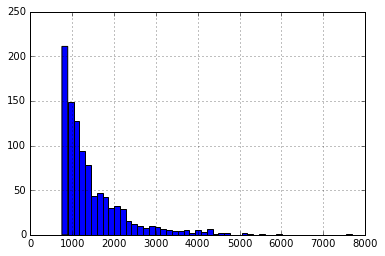

In [26]:
import matplotlib as plt
%matplotlib inline
rel_df['Score'].hist(bins = 50) 

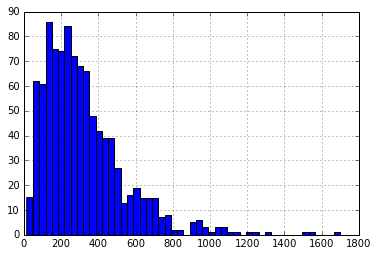

In [27]:
rel_df['Comments'].hist(bins = 50) 

In [28]:
rel_df['Score'].skew()

2.3564784923794857

In [29]:
rel_df['Score'].corr(rel_df['PosterAge'])

0.01618433976919843

In [30]:
rel_df['Comments'].corr(rel_df['PosterAge'])

0.028309395305864616

In [31]:
grouped = rel_df.groupby('Flair')
score_by_flair = grouped['Score'].median()

In [32]:
score_by_flair

Flair
Breakups           1080.0
Dating              929.0
Infidelity         1145.0
Non-Romantic       1103.5
Personal issues    1269.0
Relationships      1106.5
Updates            1252.0
Name: Score, dtype: float64

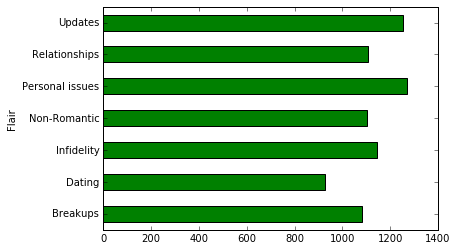

In [33]:
score_by_flair.plot(kind = 'barh', color = 'g')

In [34]:
grouped = rel_df.groupby('Flair')
comm_by_flair = grouped['Comments'].median()
comm_by_flair

Flair
Breakups           344.0
Dating             543.5
Infidelity         319.0
Non-Romantic       319.0
Personal issues    307.5
Relationships      394.5
Updates            194.0
Name: Comments, dtype: float64

In [35]:
rel_df['DayOfWeek'] = rel_df['Date'].dt.dayofweek
days = {0: 'Mon', 1: 'Tues', 2: 'Weds', 3: 'Thurs', 4: 'Fri',
        5: 'Sat', 6: 'Sun'}
rel_df['DayOfWeek'] = rel_df['DayOfWeek'].apply(lambda x: days[x])

In [36]:
rel_df[:10]

,Comments,Date,Flair,Score,Title,PosterAge,PosterSex,DayOfWeek
0,901,2015-08-21 20:07:02,Updates,7682,[UPDATE]My [26 F] with my husband [29 M] 1 yea...,26,F,Fri
1,631,2015-08-07 15:50:46,Updates,5990,Update: I [30 F] am sitting in the back of my ...,30,F,Fri
2,622,2015-06-23 02:20:34,Updates,5496,UPDATE: My fiancee (24F) has no bridesmaids an...,25,M,Tues
3,974,2015-08-01 01:38:10,NaN,5271,My [42M] daughter [17F] has been bullying a gi...,42,M,Sat
4,769,2015-08-25 22:51:57,Updates,5169,[Update] My [26F] fiance's [28M] ex-wife [28F]...,26,F,Tues
5,515,2015-09-02 12:30:58,NaN,5081,Me [42F] with my son [15M] - should I have a t...,42,F,Weds
6,428,2015-02-20 00:57:46,Updates,4772,UPDATE: Me [23 M] with my Fiance [24 F] of 3 y...,23,M,Fri
7,161,2015-08-23 14:48:03,Updates,4708,UPDATE Me [26F] with my mother [49F] Who wants...,26,F,Sun
8,289,2015-07-26 15:54:21,Updates,4578,(update)I(30m) just found out my girlfriend(28...,30,M,Sun
9,618,2014-12-06 23:50:18,Infidelity,4500,[UPDATE 2] I [22M] suspect something between m...,22,M,Sat


In [37]:
rel_df['Comments'].groupby([rel_df['DayOfWeek']]).median()

DayOfWeek
Fri      262.0
Mon      241.0
Sat      275.5
Sun      242.0
Thurs    287.5
Tues     247.0
Weds     319.0
Name: Comments, dtype: float64

In [38]:
rel_df['Score'].groupby([rel_df['DayOfWeek']]).median()

DayOfWeek
Fri      1275.0
Mon      1199.0
Sat      1240.0
Sun      1224.0
Thurs    1091.5
Tues     1163.0
Weds     1211.0
Name: Score, dtype: float64

In [39]:
rel_df.groupby(['DayOfWeek', 'Flair'])[
    ['Score', 'Comments']].median()

Score  Comments
DayOfWeek Flair                            
Fri       Breakups         1080.0     150.0
          Infidelity        985.0     254.5
          Non-Romantic     1071.0     318.5
          Personal issues  1456.0     423.5
          Relationships    1224.0     428.0
          Updates          1341.0     202.5
Mon       Breakups         1074.0     396.0
          Infidelity       1053.5     317.5
          Non-Romantic     1076.0     263.0
          Personal issues  1027.0     190.0
          Relationships    1063.0     403.0
          Updates          1273.0     192.0
Sat       Breakups         1563.0     444.0
          Dating            792.0     501.0
          Infidelity       1397.0     286.0
          Non-Romantic     1076.5     266.5
          Personal issues  1238.0     147.0
          Relationships    1049.5     376.5
          Updates          1460.0     188.0
Sun       Breakups         1156.5     256.5
          Dating            944.5     379.0
          Infidelity       1219.0     367.0
          Non-Romantic     1029.0     366.0
          Personal issues  1551.0     307.5
          Relationships    1018.0     357.0
          Updates          1308.5     156.5
Thurs     Breakups          964.5     937.5
          Infidelity        940.0     340.0
          Non-Romantic     1237.0     357.5
          Relationships    1063.0     349.5
          Updates          1091.5     199.0
Tues      Breakups         1098.0     344.0
          Dating            946.0     697.0
          Infidelity       1145.0     360.0
          Non-Romantic     1203.0     321.0
          Personal issues  1205.0     218.0
          Relationships     936.5     390.5
          Updates          1200.0     191.0
Weds      Breakups         1161.5     350.0
          Infidelity       1157.0     384.0
          Non-Romantic     1142.0     437.0
          Personal issues  1456.0     413.0
          Relationships    1243.0     397.0
          Updates          1221.0     230.0

In [40]:
score_day_flair = rel_df.groupby(['DayOfWeek', 'Flair']
                                )['Score'].median()
score_day_flair = score_day_flair.unstack()
score_day_flair = score_day_flair.drop('Dating', 1)
score_day_flair = score_day_flair.reindex(['Mon', 'Tues', 'Weds', 
                                           'Thurs', 'Fri', 'Sat', 
                                           'Sun'])

/Users/jburchell/.virtualenvs/reddit_api/lib/python2.7/site-packages/pandas/core/index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


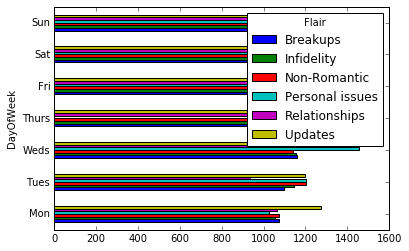

In [41]:
score_day_flair.plot(kind = 'barh')

In [42]:
score_flair = rel_df.groupby('DayOfWeek')['Score'].median()
score_flair = score_flair.reindex(['Mon', 'Tues', 'Weds', 'Thurs', 
                                   'Fri', 'Sat', 'Sun'])

In [43]:
score_flair

DayOfWeek
Mon      1199.0
Tues     1163.0
Weds     1211.0
Thurs    1091.5
Fri      1275.0
Sat      1240.0
Sun      1224.0
Name: Score, dtype: float64

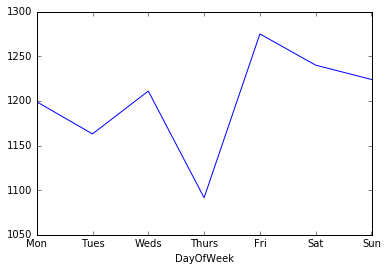

In [44]:
score_flair.plot()

In [45]:
score_com_day = rel_df.groupby('DayOfWeek')[
    ['Score', 'Comments']].median()
score_com_day = score_com_day.reindex(['Mon', 'Tues', 'Weds', 
                                       'Thurs', 'Fri', 'Sat', 
                                       'Sun'])

In [46]:
score_com_day = score_com_day.transpose()
score_com_pcts = score_com_day.div(score_com_day.sum(1).
                                  astype(float), axis = 0)
score_com_pcts

DayOfWeek,Mon,Tues,Weds,Thurs,Fri,Sat,Sun
Score,0.142679,0.138395,0.144107,0.129886,0.151722,0.147558,0.145654
Comments,0.128602,0.131804,0.170224,0.153415,0.139808,0.147012,0.129136


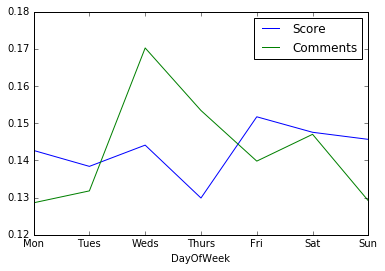

In [47]:
score_com_pcts.transpose().plot()

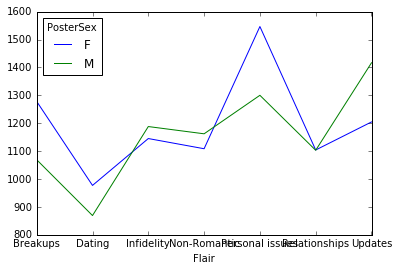

In [48]:
score_flair = rel_df.groupby(['Flair', 'PosterSex'])['Score'].median()
score_flair.unstack().plot()

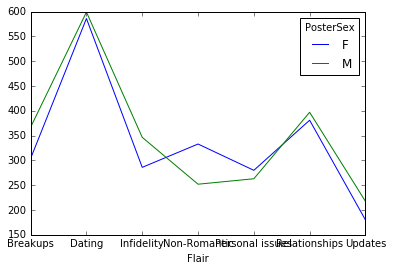

In [49]:
score_flair = rel_df.groupby(['Flair', 'PosterSex'])['Comments'].median()
score_flair.unstack().plot()